# EDA

In [1]:
# Імпортуємо необхідні бібліотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Графічний стиль
sns.set(style="whitegrid")

data = load_breast_cancer(as_frame=True)
df = data.frame.copy()

# 2. Завантажуємо датасет
data = load_breast_cancer(as_frame=True)
df = data.frame.copy()


In [2]:

# Показуємо перші 5 записів
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
# Показуємо остані 5 записів
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [4]:
df.shape

(569, 31)

In [5]:
#  Загальна інформація про набір даних
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

# *summary statistics*


In [6]:
#Основна статистика по числових змінних
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [7]:
# Перевірка наявності пропущених значень
df.isnull().sum()


mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [8]:
# Перевірка кількості унікальних значень та типів даних
df.nunique()


mean radius                456
mean texture               479
mean perimeter             522
mean area                  539
mean smoothness            474
mean compactness           537
mean concavity             537
mean concave points        542
mean symmetry              432
mean fractal dimension     499
radius error               540
texture error              519
perimeter error            533
area error                 528
smoothness error           547
compactness error          541
concavity error            533
concave points error       507
symmetry error             498
fractal dimension error    545
worst radius               457
worst texture              511
worst perimeter            514
worst area                 544
worst smoothness           411
worst compactness          529
worst concavity            539
worst concave points       492
worst symmetry             500
worst fractal dimension    535
target                       2
dtype: int64

In [9]:
#Кореляція Пірсона
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


# Data Visualization

<Axes: >

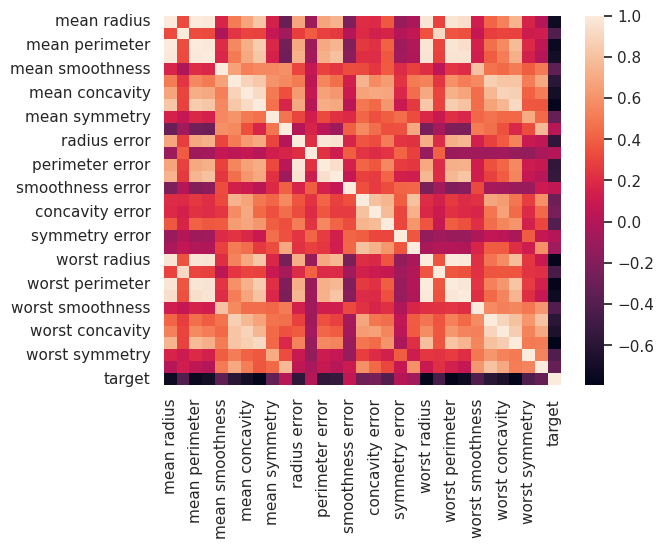

In [10]:
c = df.corr()
sns.heatmap(c)

<Axes: >

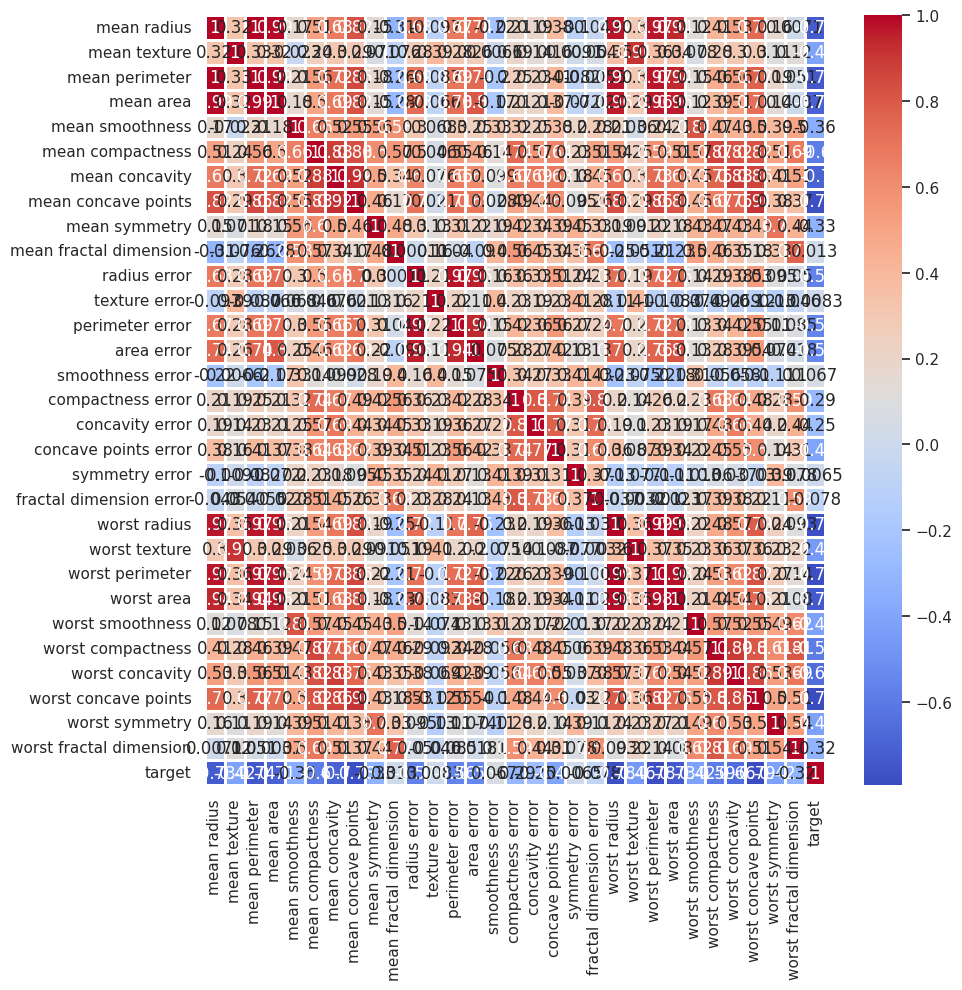

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True, cmap ='coolwarm', linewidths=2)

Pair plot of sample feature of DataFrame

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

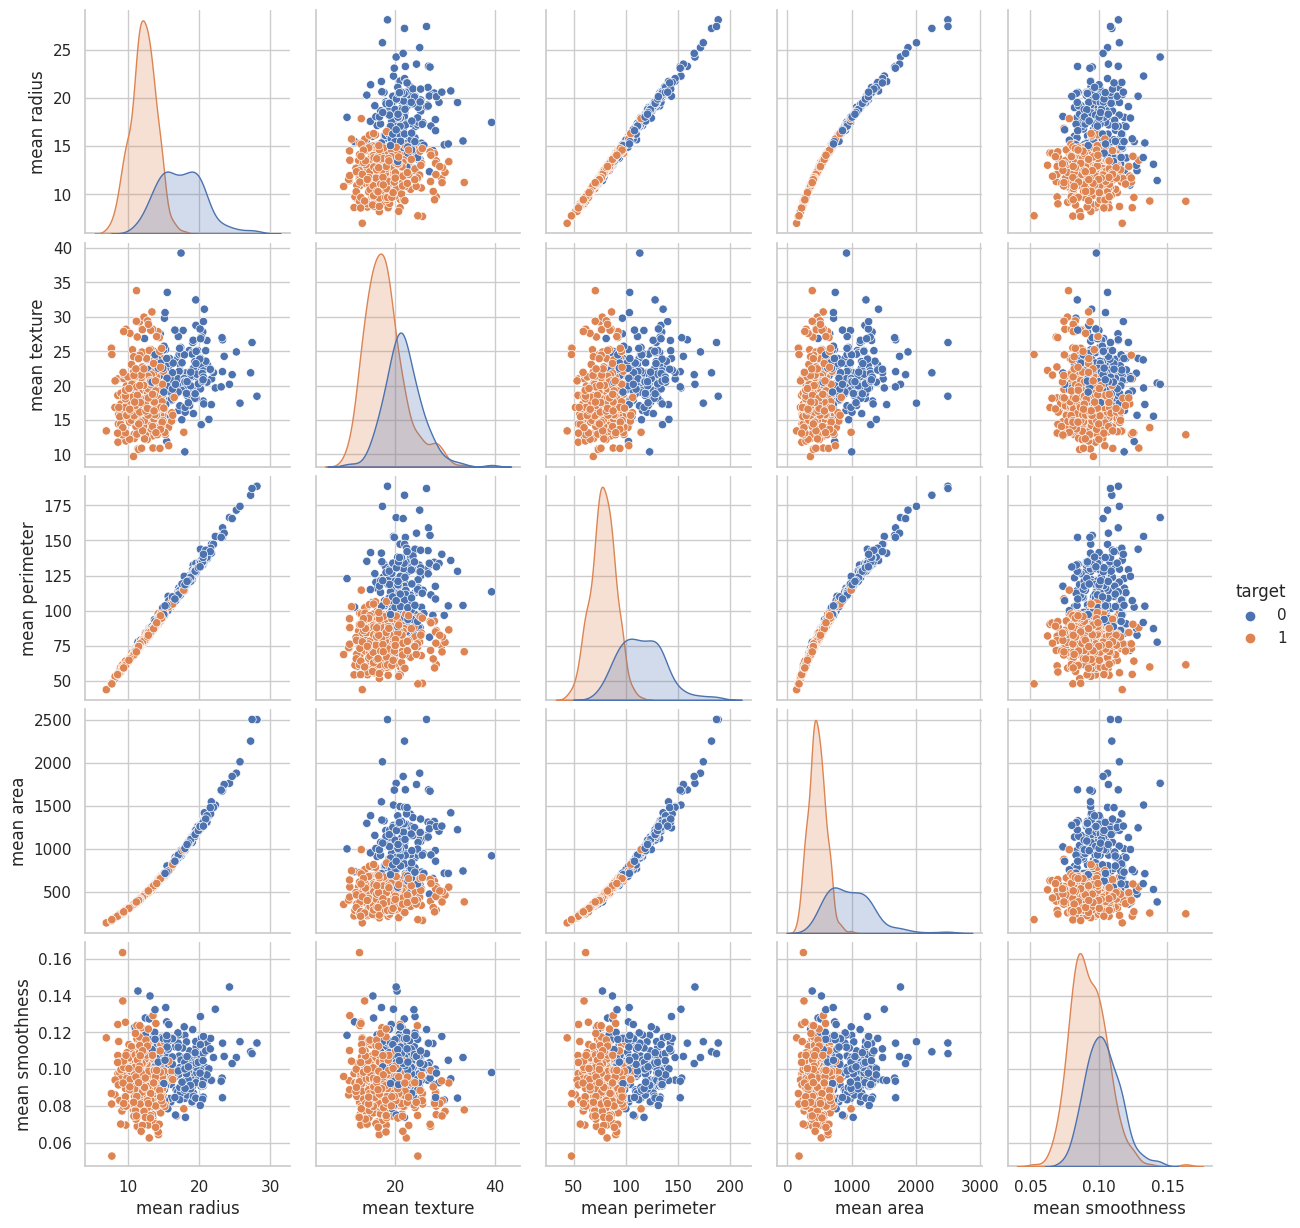

In [12]:
# pair plot of sample feature
sns.pairplot(df, hue = 'target', 
             vars = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'] )

Showing the total count of malignant and benign tumor patients in counterplot.

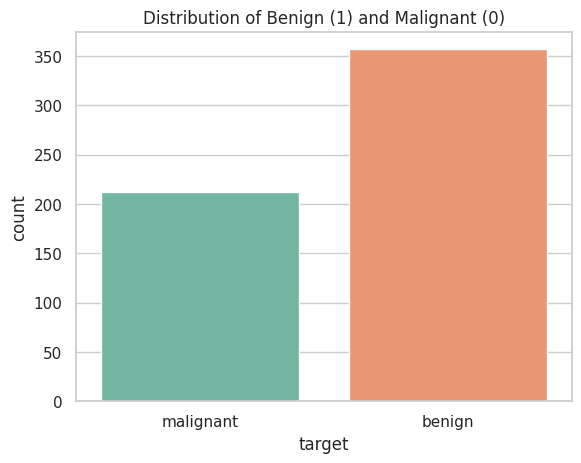

In [13]:
# Count the target class
# Value counts
sns.countplot(x=data.target, palette="Set2")
plt.title("Distribution of Benign (1) and Malignant (0)")
plt.xticks([0,1], data.target_names)
plt.show()


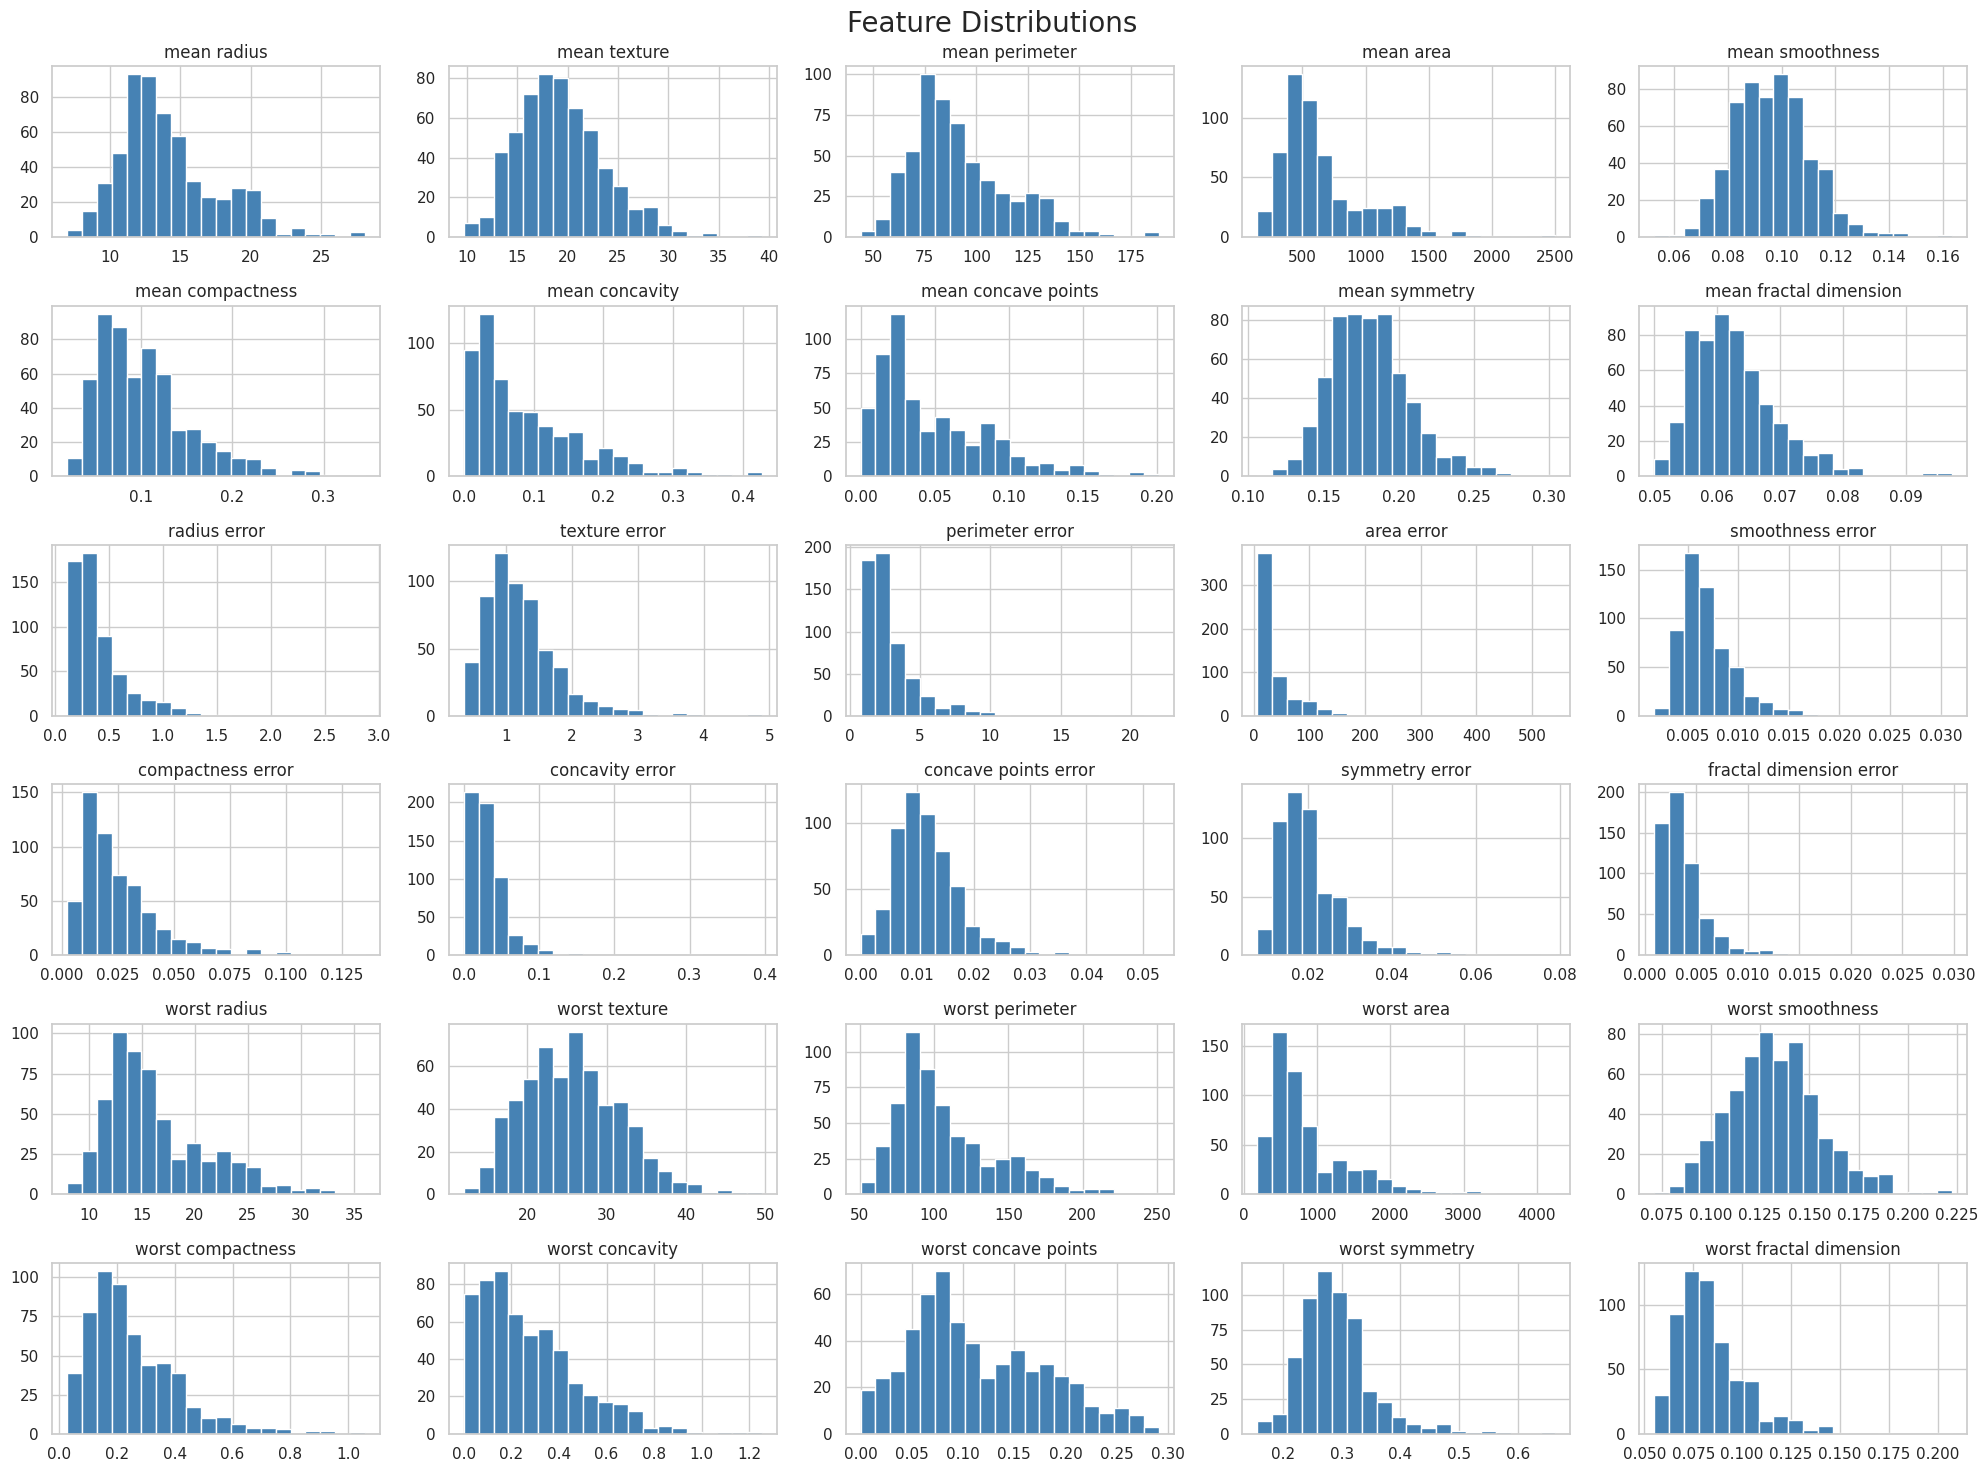

In [14]:
# Histograms for all features
df.iloc[:, :-1].hist(bins=20, figsize=(20, 15), color='steelblue')
plt.suptitle("Feature Distributions", fontsize=20)
plt.tight_layout()
plt.show()


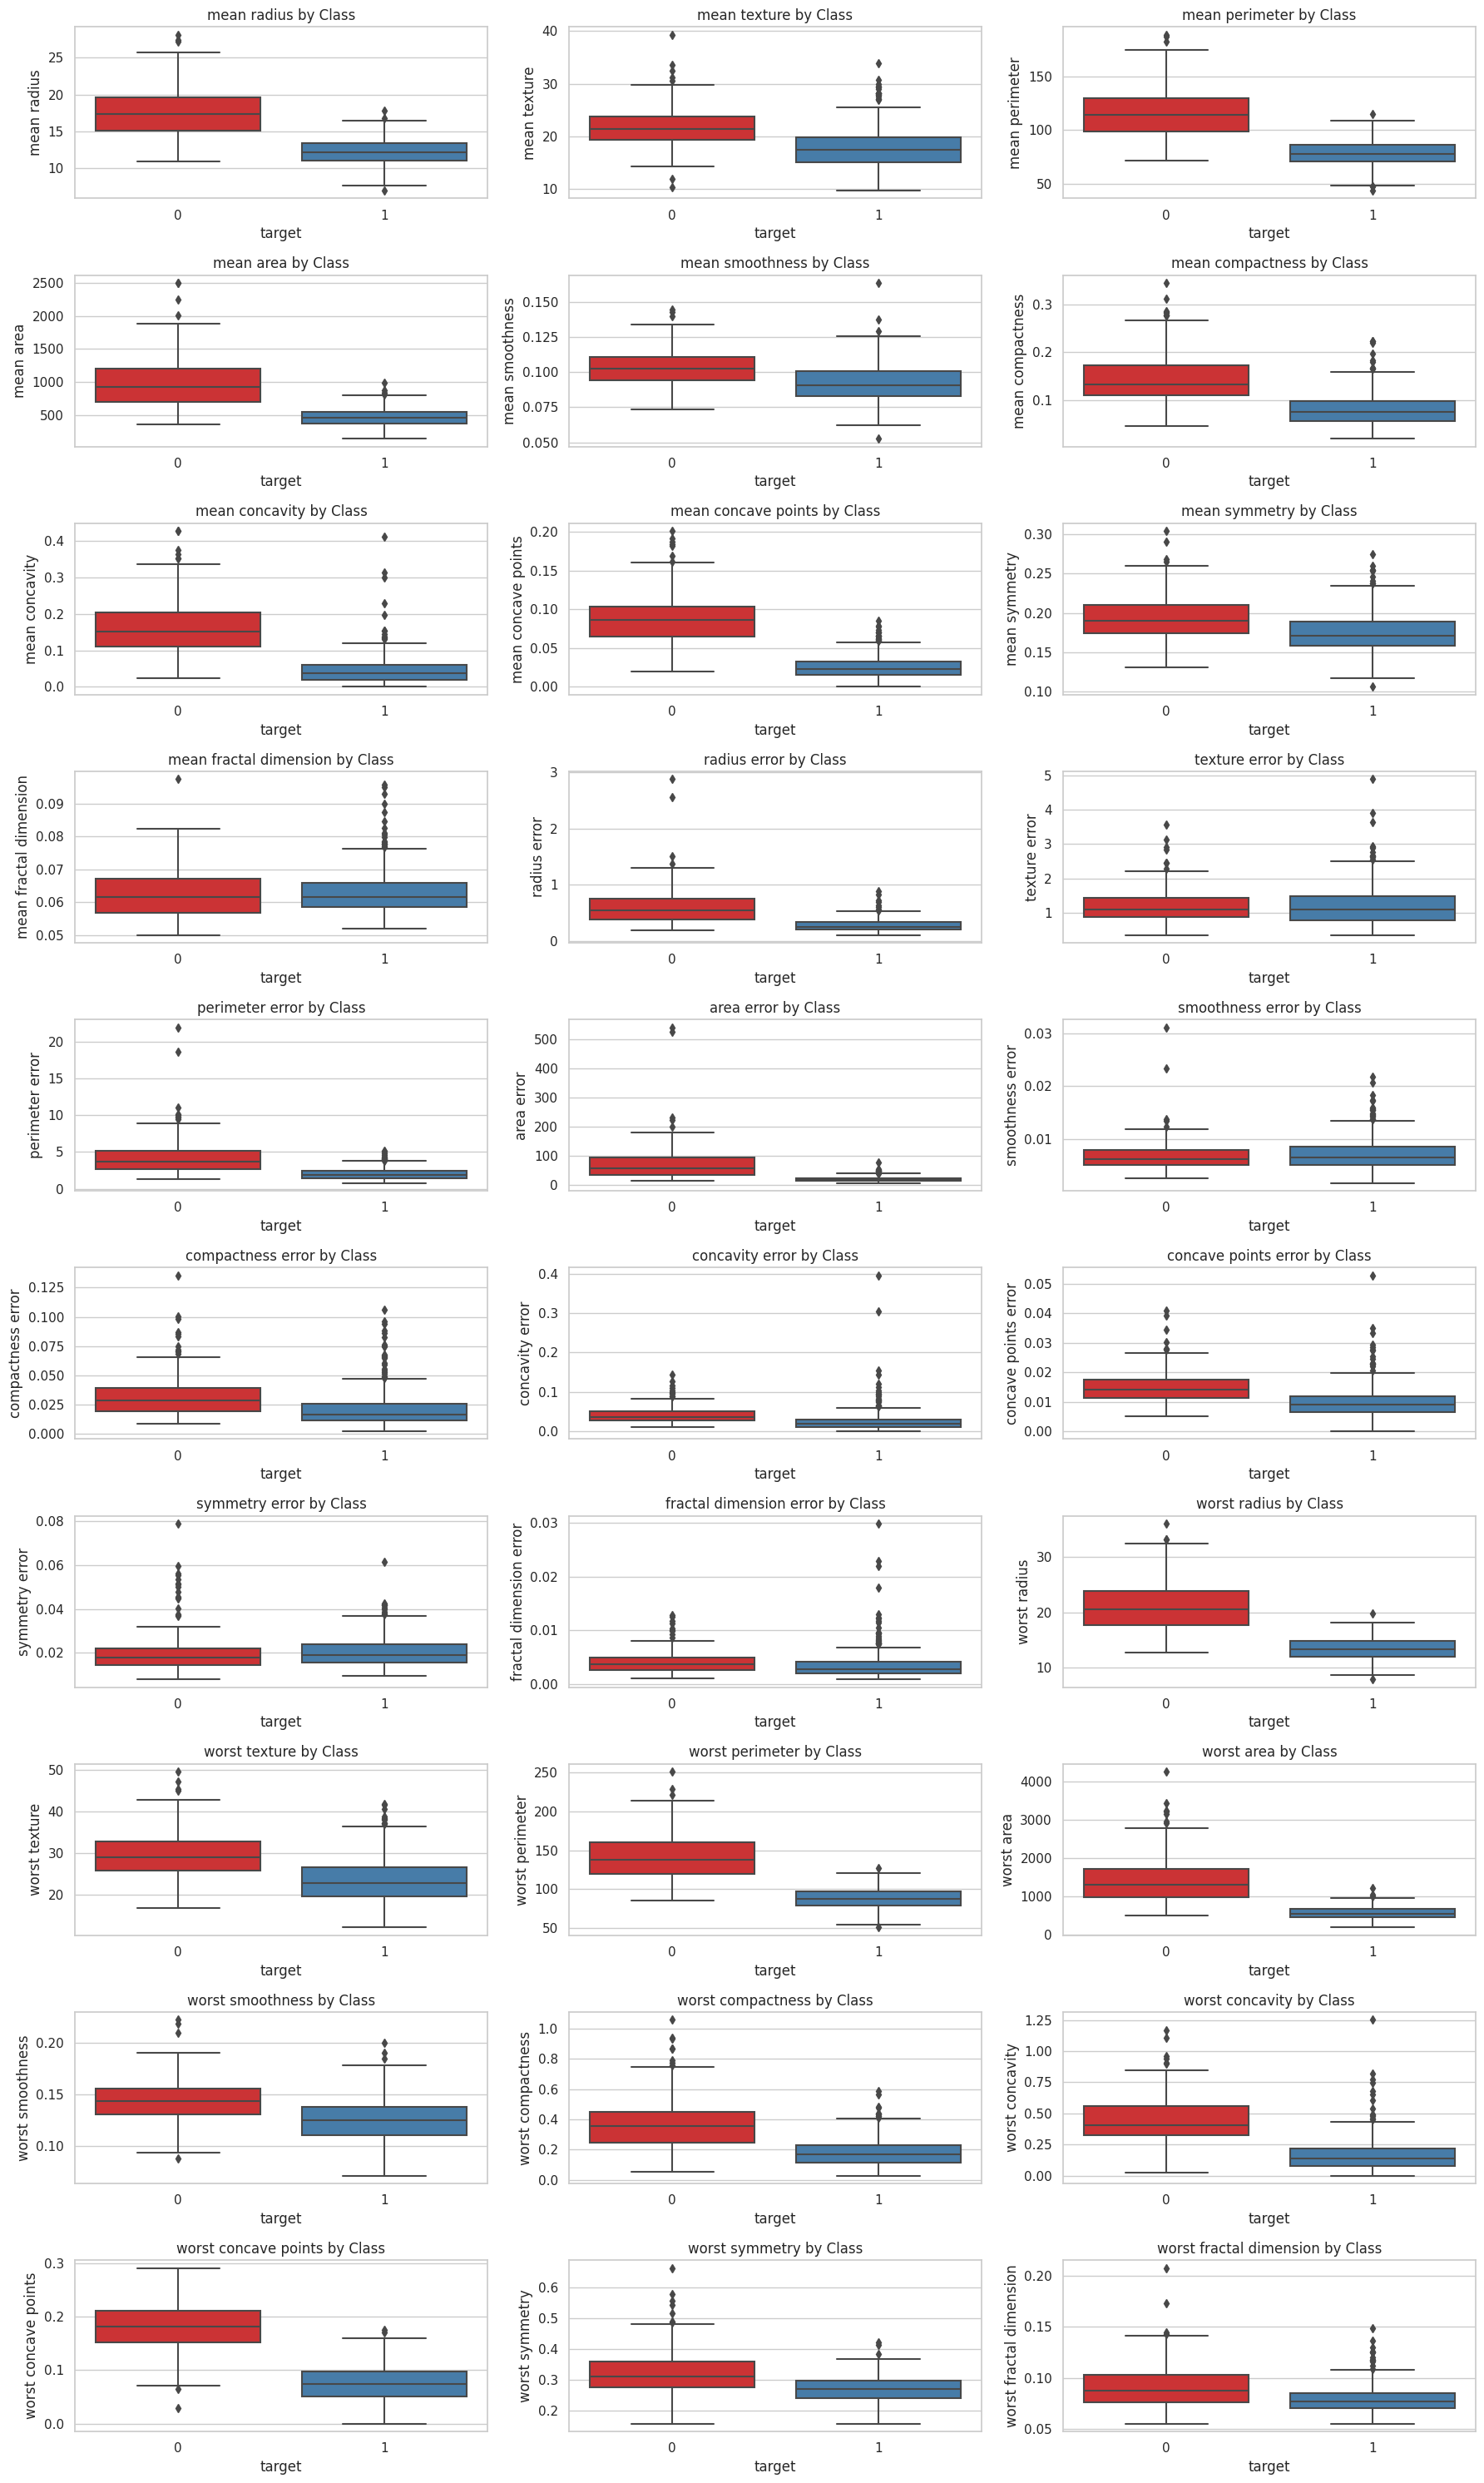

In [15]:
features = df.columns[:-1]
fig, axs = plt.subplots(10, 3, figsize=(18, 30))
axs = axs.ravel()

for i in range(30):
    sns.boxplot(data=df, x='target', y=features[i], ax=axs[i], palette='Set1')
    axs[i].set_title(f'{features[i]} by Class')

plt.tight_layout()
plt.show()


# Data Preprocessing

In [16]:
# input variable
X = df.drop(['target'], axis = 1)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
# output variable
y = df['target']
y.head(6)

0    0
1    0
2    0
3    0
4    0
5    0
Name: target, dtype: int64

In [18]:
# split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 5)

Конвертація різних юнітів і величин в один тип

In [19]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# Logistic Regression

In [20]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1',solver="saga",random_state=51)
lr.fit(X_train, y_train)

#accuracy_score(y_test, y_pred_lr)

# Train with Standard scaled Data
lr2 = LogisticRegression(random_state = 51,solver="saga", penalty = 'l1')
lr2.fit(X_train_sc, y_train)

#accuracy_score(y_test, y_pred_lr  )

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='l1', random_state=51, solver='saga')

In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression(
        penalty='l1',
        solver='saga',
        random_state=51,
        max_iter=5000
    )
)

pipe.fit(X_train, y_train)      # <- тепер pipe існує

# далі той самий код
beta = pipe.named_steps['logisticregression'].coef_.ravel()
coef_df = (
    pd.Series(beta, index=X.columns)
      .to_frame('beta')
      .assign(odds_ratio = lambda d: np.exp(d['beta']),
              abs_beta   = lambda d: d['beta'].abs())
      .sort_values('abs_beta', ascending=False)
)

coef_df.head(10)


,beta,odds_ratio,abs_beta
worst radius,-1.976078,0.138612,1.976078
worst texture,-1.889448,0.151155,1.889448
radius error,-1.863710,0.155096,1.863710
worst area,-1.547072,0.212870,1.547072
worst concavity,-1.081334,0.339143,1.081334
mean concave points,-1.045642,0.351466,1.045642
area error,-0.995919,0.369384,0.995919
worst smoothness,-0.817289,0.441627,0.817289
compactness error,0.770127,2.160040,0.770127
worst perimeter,-0.744556,0.474945,0.744556


from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    classification_report,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

def evaluate(model, X_tr, y_tr, X_te, y_te, pos_label=1):
    """Train‑test evaluation helper for binary classifiers."""
    
    # ---------- Train ----------
    tr_pred = model.predict(X_tr)
    tr_prob = model.predict_proba(X_tr)[:, 1]

    train_metrics = {
        "Accuracy" : accuracy_score(y_tr, tr_pred),
        "Precision": precision_score(y_tr, tr_pred, pos_label=pos_label),
        "Recall"   : recall_score(y_tr, tr_pred, pos_label=pos_label),
        "F1‑score" : f1_score(y_tr, tr_pred, pos_label=pos_label),
        "ROC‑AUC"  : roc_auc_score(y_tr, tr_prob)
    }
    
    # ---------- Test ----------
    te_pred = model.predict(X_te)
    te_prob = model.predict_proba(X_te)[:, 1]

    test_metrics = {
        "Accuracy" : accuracy_score(y_te, te_pred),
        "Precision": precision_score(y_te, te_pred, pos_label=pos_label),
        "Recall"   : recall_score(y_te, te_pred, pos_label=pos_label),
        "F1‑score" : f1_score(y_te, te_pred, pos_label=pos_label),
        "ROC‑AUC"  : roc_auc_score(y_te, te_prob)
    }
    
    print("=== Train ===")
    print(classification_report(y_tr, tr_pred, target_names=["neg", "pos"]))
    print("=== Test ===")
    print(classification_report(y_te, te_pred, target_names=["neg", "pos"]))

    # Confusion matrix (test set)
    ConfusionMatrixDisplay.from_predictions(y_te, te_pred, display_labels=["neg","pos"])
    plt.title("Confusion matrix – test data")
    plt.show()

    # ROC curve (test set)
    fpr, tpr, _ = roc_curve(y_te, te_prob, pos_label=pos_label)
    plt.plot(fpr, tpr, lw=2)
    plt.plot([0,1],[0,1], ls="--", lw=1)
    plt.xlabel("False‑positive rate")
    plt.ylabel("True‑positive rate")
    plt.title("ROC curve – test data")
    plt.show()
    
    return train_metrics, test_metrics


lr = LogisticRegression(penalty="l1", solver="saga", random_state=51)
lr.fit(X_train, y_train)

train_res, test_res = evaluate(lr, X_train, y_train, X_test, y_test)
print("Train metrics:", train_res)
print("Test metrics :", test_res)
